In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'C:\Users\\perro\Downloads\titanic\train.csv')
df_train = data
df_test= pd.read_csv(r'C:\Users\perro\Downloads\titanic\test.csv')

y = data.Survived
X = data.drop(['Survived'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size= 0.8,
                                                                test_size=0.2)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10
                    and X_train_full[cname].dtype == 'object']
                    
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
# X_train = pd.read_csv(train_path)
# titanic_test = pd.read_csv(test_path)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 8 columns):
Sex            712 non-null object
Embarked       710 non-null object
PassengerId    712 non-null int64
Pclass         712 non-null int64
Age            572 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [5]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


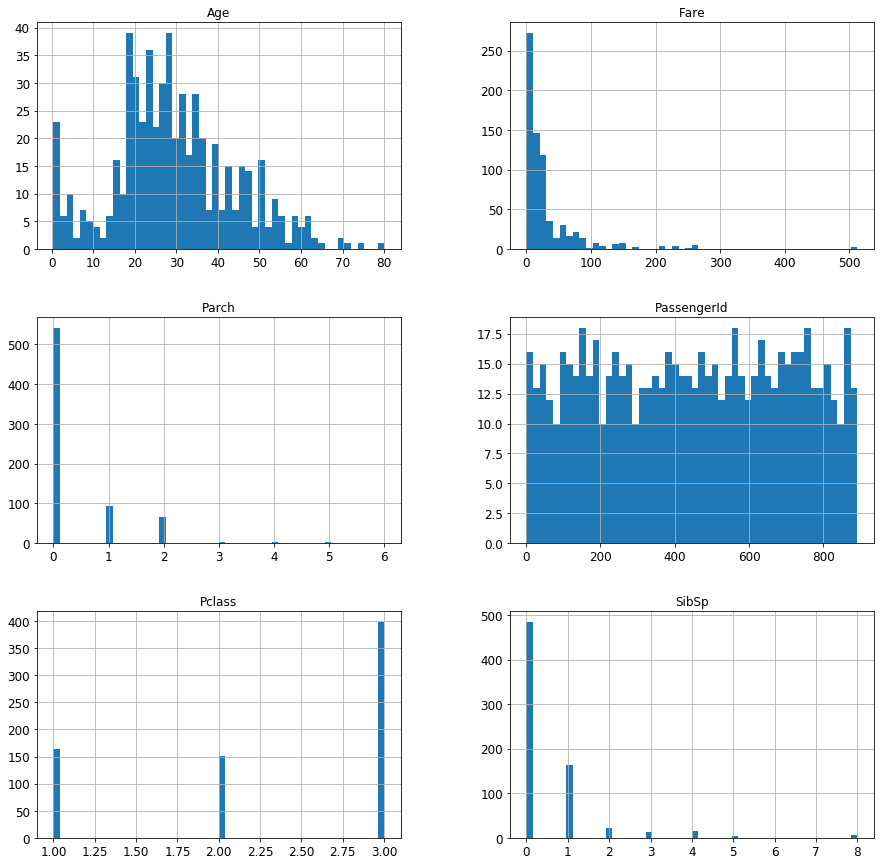

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(15,15))
plt.show()

In [7]:
corr_matrix = data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

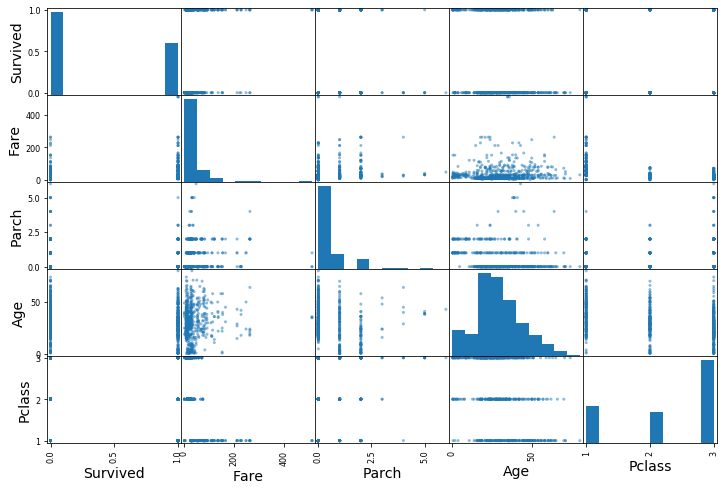

In [8]:
from pandas.plotting import scatter_matrix
features = ['Survived', 'Fare', 'Parch',
            'Age', 'Pclass', 'Sex']
scatter_matrix(data[features], figsize=(12, 8))
plt.show()

In [9]:
passengers = data.copy()
passengers["Pclass_vs_Fare"] = passengers["Pclass"] / passengers["Fare"]
passengers["Pclass_vs_Age"] = passengers["Pclass"] / passengers["Age"]
passengers["Fare_vs_Age"] = passengers["Fare"] / passengers["Age"]
passengers["Age_vs_Fare"] = passengers["Age"] / passengers["Fare"]
corr_matrix = passengers.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived          1.000000
Fare              0.257307
Fare_vs_Age       0.138080
Pclass_vs_Age     0.101245
Parch             0.081629
PassengerId      -0.005007
SibSp            -0.035322
Age              -0.077221
Pclass_vs_Fare   -0.325686
Pclass           -0.338481
Age_vs_Fare      -0.346014
Name: Survived, dtype: float64

In [10]:
#Survived=True or Survived=False
#891 booleans
data.Survived.count()

891

In [11]:
#only 38.3% of people survived 
data.Survived.sum() / data.Survived.count()

0.3838383838383838

In [12]:
#Compare chances of survival between men and women
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

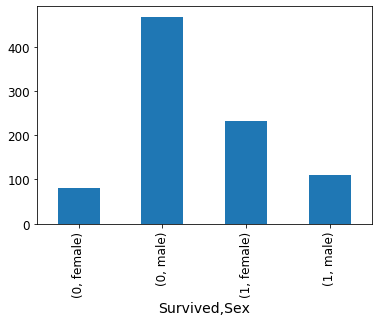

In [13]:
data.groupby(['Survived','Sex'])['Survived'].count().plot(kind="bar")

In [14]:
print("% of women survived: ", data[data.Sex == 'female'].Survived.sum() / data[data.Sex == 'female'].Survived.count())
print("% of men survived: ", data[data.Sex == 'male'].Survived.sum() / data[data.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:  0.18890814558058924


In [15]:
data.groupby(['Survived', 'Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

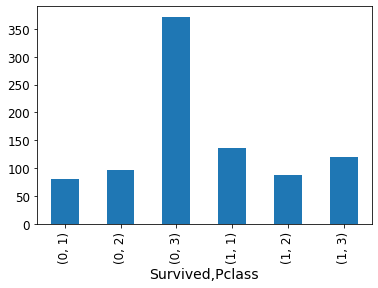

In [16]:
data.groupby(['Survived', 'Pclass'])['Survived'].count().plot(kind="bar")
plt.show()

In [17]:
print("% of 3rd class survived:", data[data.Pclass == 3].Survived.sum() / data[data.Pclass ==3].Survived.count())
print("% of 2nd class survived:", data[data.Pclass == 2].Survived.sum() / data[data.Pclass ==2].Survived.count())
print("% of 1st class survived:", data[data.Pclass == 1].Survived.sum() / data[data.Pclass ==1].Survived.count())

% of 3rd class survived: 0.24236252545824846
% of 2nd class survived: 0.47282608695652173
% of 1st class survived: 0.6296296296296297


### Passenger Class and Sex

In [18]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

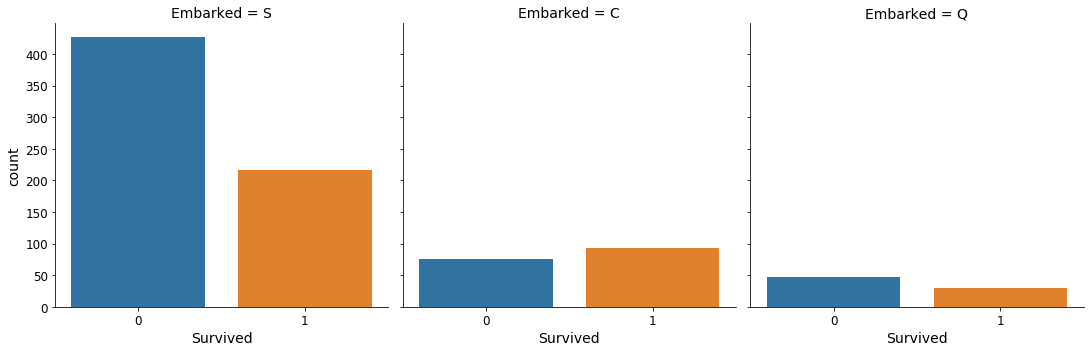

In [19]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)

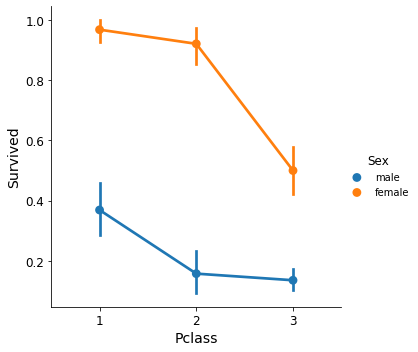

In [20]:
sns.catplot('Pclass', 'Survived', hue='Sex', kind='point', data=df_train)

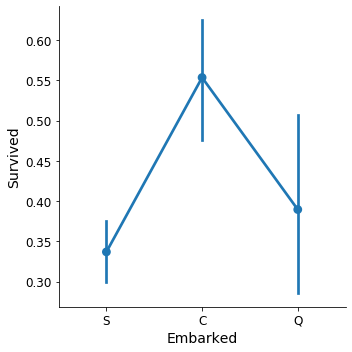

In [21]:
sns.catplot('Embarked', 'Survived', kind='point', data= df_train)

### Embarked and Sex

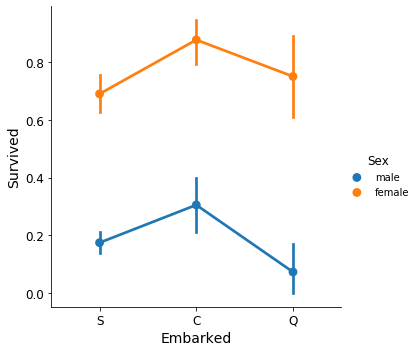

In [22]:
#Southampton, Cherbourg,and Queenstown
sns.catplot('Embarked', 'Survived', hue='Sex', kind='point', data=df_train)

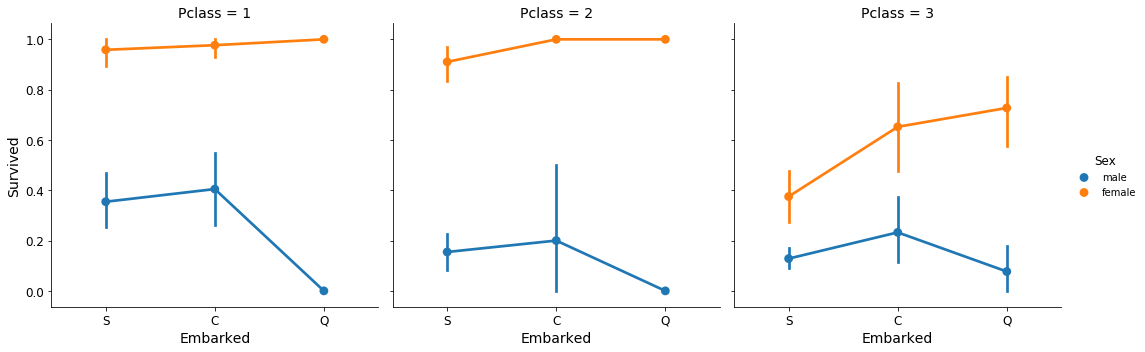

In [23]:
sns.catplot('Embarked', 'Survived', col='Pclass', kind='point', hue='Sex', data=df_train)

In [24]:
pd.crosstab(df_train.Survived, [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True).style.background_gradient('autumn_r')

In [25]:
#assigns each passenger in the train and test set
#a column 'Age_bin', based on their age
#There are 8 bins, each bin is a 10 year period
for df in [df_train, df_test]:  
    df['Age_bin'] = np.nan
    for i in range(8,0,-1):
        df.loc[ df.Age <= i*10, 'Age_bin'] = i

In [26]:
print(df_train[['Age', 'Age_bin']].head(10)) # a list of columns
print("\n", df_train.head())

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0

    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_bin  
0      0         A/5 21171   7.2500   NaN        S      3.0  
1      

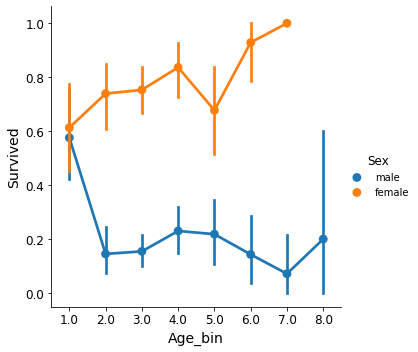

In [27]:
#Survival rate of men and women based on their age
sns.catplot('Age_bin', 'Survived', hue='Sex', kind='point', data=df_train)

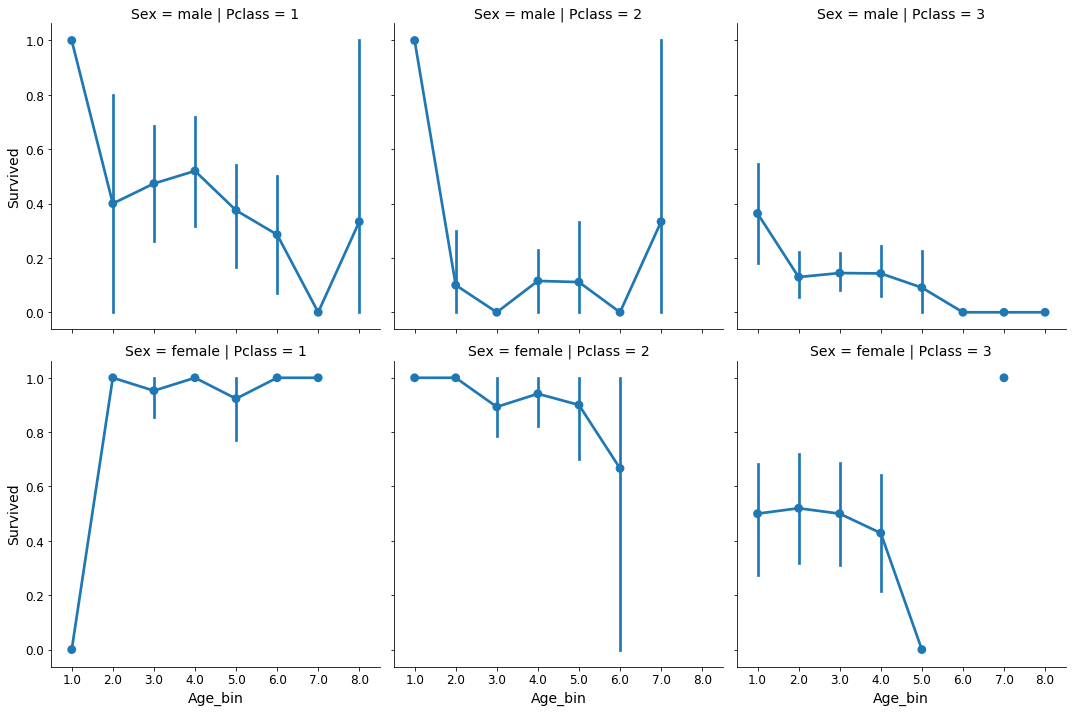

In [28]:
sns.catplot('Age_bin', 'Survived', col='Pclass', row='Sex', kind='point', data=df_train)


In [29]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient('autumn_r')

In [30]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,6.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2.0


In [31]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

### Sibling/Spouse and Parent/Children

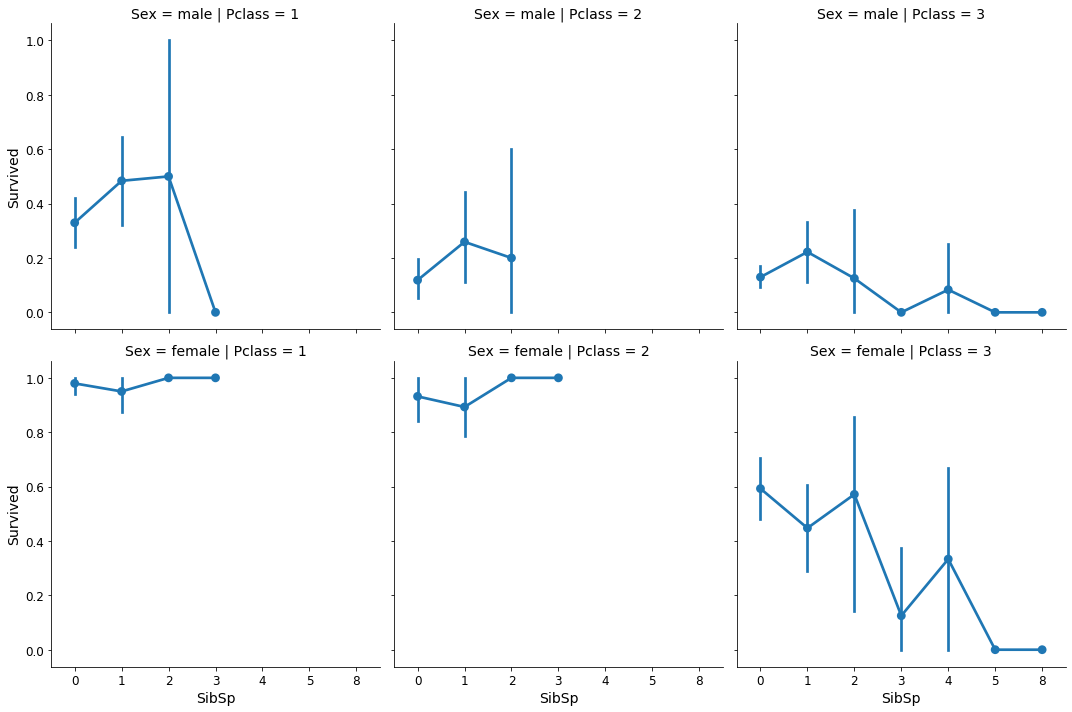

In [32]:
sns.catplot('SibSp', 'Survived', col='Pclass', row='Sex', kind='point', data=df_train)

In [33]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Pclass, df_train.SibSp], margins=True).style.background_gradient('autumn_r')

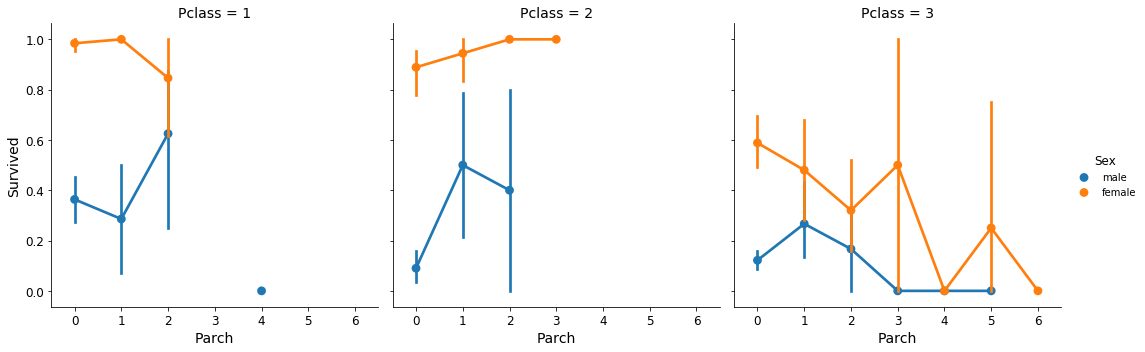

In [34]:
sns.catplot('Parch', 'Survived', hue='Sex', kind='point', col='Pclass',  data=df_train)

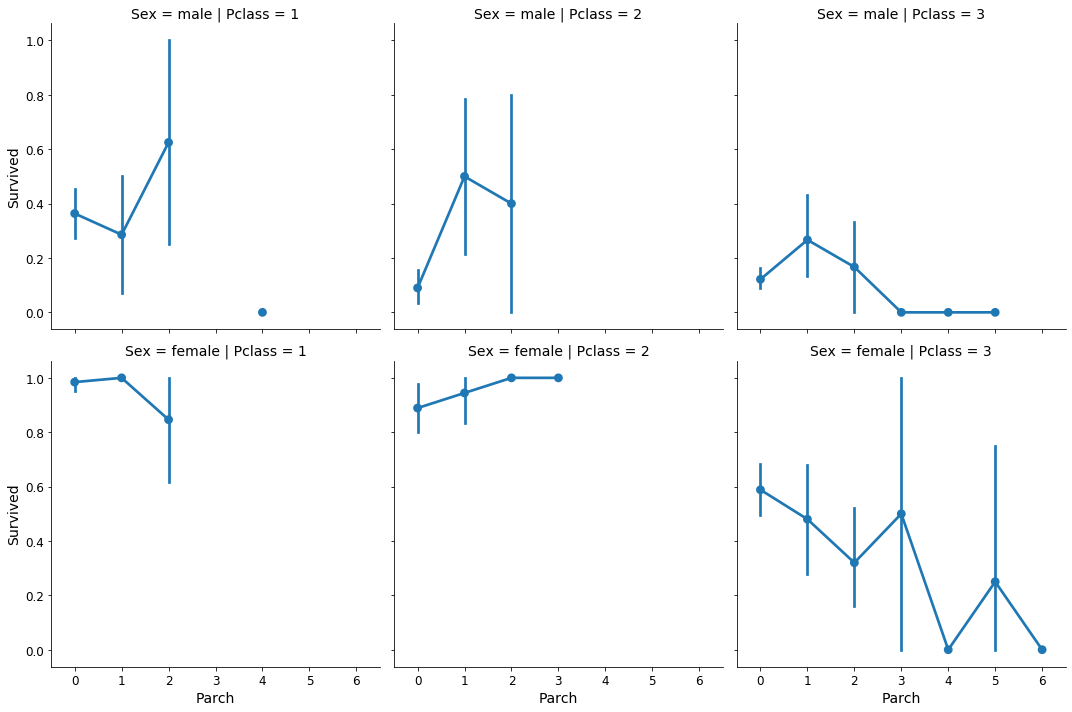

In [35]:
sns.catplot('Parch', 'Survived',kind='point', col='Pclass', row='Sex', data=df_train)

In [36]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient('autumn_r')

### Fare

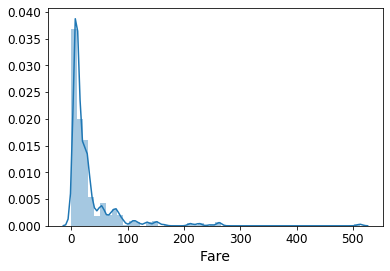

In [37]:
sns.distplot(df_train['Fare'])

In [38]:
for df in [df_train, df_test]:
    df['Fare_bin'] = np.nan
    for i in range(12, 0, -1):
        df.loc[df['Fare'] <= i*50, 'Fare_bin'] = i

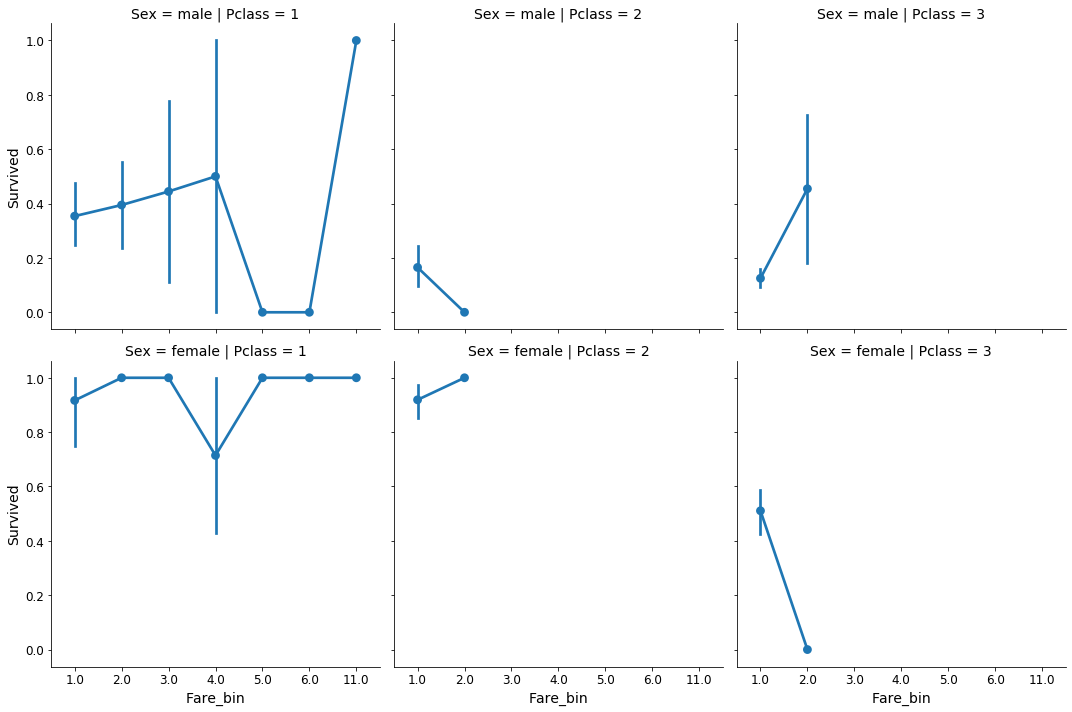

In [39]:
sns.catplot('Fare_bin', 'Survived', col='Pclass', row='Sex',kind='point', data=df_train)

In [40]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient('autumn_r')

### Train a Binary Classifier

building two new dataframes df_train_ml and df_test_ml
these will have only ordinal features and no missing values so they can be used for ML algorithms
converting categorical to numerical by pd.get_dummies
dropping all features that seem to be not useful for prediction
Then use the Standard scaler and apply train/test split

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_bin        714 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [42]:
df_train_ml = df_train.copy()
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_bin        714 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [44]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder()),
])

In [45]:
cat_attribs = ['Pclass','Sex', 'Embarked']

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, cat_attribs)
])

df_train_prepared = preprocessor.fit_transform(df_train)
df_test_prepared = preprocessor.fit_transform(df_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=1, random_state=42)
forest_clf.fit(df_train_prepared, y)
forest_scores = cross_val_score(forest_clf, df_train_prepared, y, cv=10)
forest_scores

array([0.75555556, 0.72222222, 0.74157303, 0.71910112, 0.76404494,
       0.71910112, 0.82022472, 0.68539326, 0.7752809 , 0.78409091])

In [47]:
forest_scores.mean()

0.7486587787992283

In [48]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Survived,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0,NaN,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0,NaN,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0,NaN,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0,NaN,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4.0,NaN,3.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,4.0,NaN,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,1.0


In [49]:
print(df_test.shape)

(418, 14)


In [50]:
# Generate test predictions
preds = forest_clf.predict(df_test_prepared)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'PassengerId': df_test.PassengerId,
                       'Survived': preds})
output.to_csv('submission.csv', index=False)

In [51]:
df_test_prepared = preprocessor.fit_transform(df_test)
forest_clf.predict(df_test_prepared)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
from sklearn.ensemble import RandomForestClassifier

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

model = RandomForestClassifier(n_estimators=100,random_state=42)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)
preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [53]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(preds, y_valid))
validation_score = cross_val_score(my_pipeline, X_valid, y_valid, cv=10)
print(validation_score.mean())

0.1564245810055866
0.7870657034743721
